# ML regression

I'm going to:

- Normalise the dataset before applying ML. 
- Use **RFE** (Recursive Feature Elimination) to select the best 15 columns to work with, from the 133 I have.
- Split for validation methond (i'm still figuring out if k-folds or train-validation-test).
- Once my model is trained, infer data in the whole dataset, to have a dashboard comparing *real keyword* vs *infered keyword*.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
#from sklearn import preprocessing

In [2]:
df=pd.read_csv("input/dataset_final_processed.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,date,protestas_x,extremismo_x,rebelion_x,refugiados_x,precio_petroleo_x,juicio_x,corrupcion_x,inestabilidad_politica_x,terrorismo_x,...,teletrabajo,tinder,uber,uber eats,videoconferencia,videollamada,vox,yoga,zoom,unemployment
0,2019-01-27,-0.986667,-29.993333,-21.453333,-6.425000,0.00,-111.880000,-92.164000,-7.770000,-82.140000,...,2.0,56.0,27.0,10.0,2.0,2.0,35.0,50.0,5.0,21.0
1,2019-02-03,-16.754286,-2.260000,-17.413333,-15.266667,0.00,-485.394286,-168.828571,-23.500000,-11.586667,...,1.0,51.0,35.0,15.0,3.0,1.0,27.0,44.0,4.0,23.0
2,2019-02-10,-98.830000,-5.644000,-26.305000,0.000000,3.72,-232.251429,-106.468571,-36.120000,-145.260000,...,2.0,50.0,100.0,9.0,3.0,2.0,16.0,41.0,3.0,23.0
3,2019-02-17,-41.448571,-4.226667,-26.570000,1.276000,0.00,-233.122857,-106.342857,-24.146667,-34.084000,...,2.0,52.0,78.0,11.0,3.0,3.0,11.0,49.0,4.0,23.0
4,2019-02-24,-35.362857,0.000000,-28.106667,-20.310000,0.00,-173.451429,-112.497143,-5.160000,-24.512000,...,1.0,50.0,40.0,11.0,3.0,2.0,13.0,48.0,4.0,20.0


In [3]:
print("I have ", len(df.columns), " columns to play with")#columns=list(df.columns)

I have  132  columns to play with


# Normalise

- This dataset is composed by datasets with different scale, so normalize values is needed.
- To face a time series problem, working with NN is needed, and it tends to be computationally intensive, so I will play without the *date* column. Later it will be used for dashboarding.

In [4]:
# Transform into standard normal distribution using the z-score definition
X = df.drop(columns=["date","unemployment"]) #returns a numpy array
X = X.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
target=df["unemployment"]

In [5]:
X.head()

,protestas_x,extremismo_x,rebelion_x,refugiados_x,precio_petroleo_x,juicio_x,corrupcion_x,inestabilidad_politica_x,terrorismo_x,vigilancia_x,...,taxi,teletrabajo,tinder,uber,uber eats,videoconferencia,videollamada,vox,yoga,zoom
0,0.079454,-0.227000,-0.048510,0.004997,0.055642,0.126841,-0.005161,0.042840,-0.408330,-0.129363,...,-0.059938,-0.125725,-0.244889,-0.186170,-0.394903,-0.090157,-0.069955,0.191150,0.040725,-0.098157
1,0.018951,0.038086,-0.013077,-0.073158,0.055642,-0.642666,-0.290909,-0.007129,0.077374,-0.537050,...,0.025428,-0.135826,-0.342929,-0.083606,-0.339958,-0.080056,-0.080056,0.106043,-0.053025,-0.108467
2,-0.295988,0.005740,-0.091062,0.061790,0.324817,-0.121146,-0.058478,-0.047218,-0.842861,-0.335707,...,0.647379,-0.125725,-0.362537,0.749727,-0.405892,-0.080056,-0.069955,-0.010978,-0.099900,-0.118776
3,-0.075805,0.019288,-0.093386,0.073069,0.055642,-0.122941,-0.058010,-0.009183,-0.077503,0.065125,...,0.464453,-0.125725,-0.323321,0.467676,-0.383914,-0.080056,-0.059854,-0.064169,0.025100,-0.108467
4,-0.052453,0.059688,-0.106864,-0.117738,0.055642,-0.000007,-0.080948,0.051131,-0.011607,-0.014582,...,0.244940,-0.135826,-0.362537,-0.019504,-0.383914,-0.080056,-0.069955,-0.042893,0.009475,-0.108467


In [6]:
target.head()

0    21.0
1    23.0
2    23.0
3    23.0
4    20.0
Name: unemployment, dtype: float64

# Selecting best features using RFE

(Recursive Feature Elimination)

In [7]:
rfc = LinearRegression()
rfecv = RFE(estimator=rfc, step=1, n_features_to_select=15)
rfecv.fit(X, target)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

# CSV with infered keyword vs real keyword

- Last 3 rows are the truly interesting one... Foreseeing with 3 weeks in advance

This needs to be restructured. Splitted into train/validation/test or k-folds. Just the 1st trial

In [11]:
result=pd.DataFrame()
result["date"]=df["date"]
result["real_searches"]=df["unemployment"]
result["infered_searches"]=pd.DataFrame(rfecv.predict(X))
result["infered_searches"]=result["infered_searches"].apply(lambda x: 0 if x<0 else round(x,2))
result.head()

,date,real_searches,infered_searches
0,2019-01-27,21.0,17.92
1,2019-02-03,23.0,22.33
2,2019-02-10,23.0,22.30
3,2019-02-17,23.0,22.23
4,2019-02-24,20.0,14.77


In [12]:
# visualization

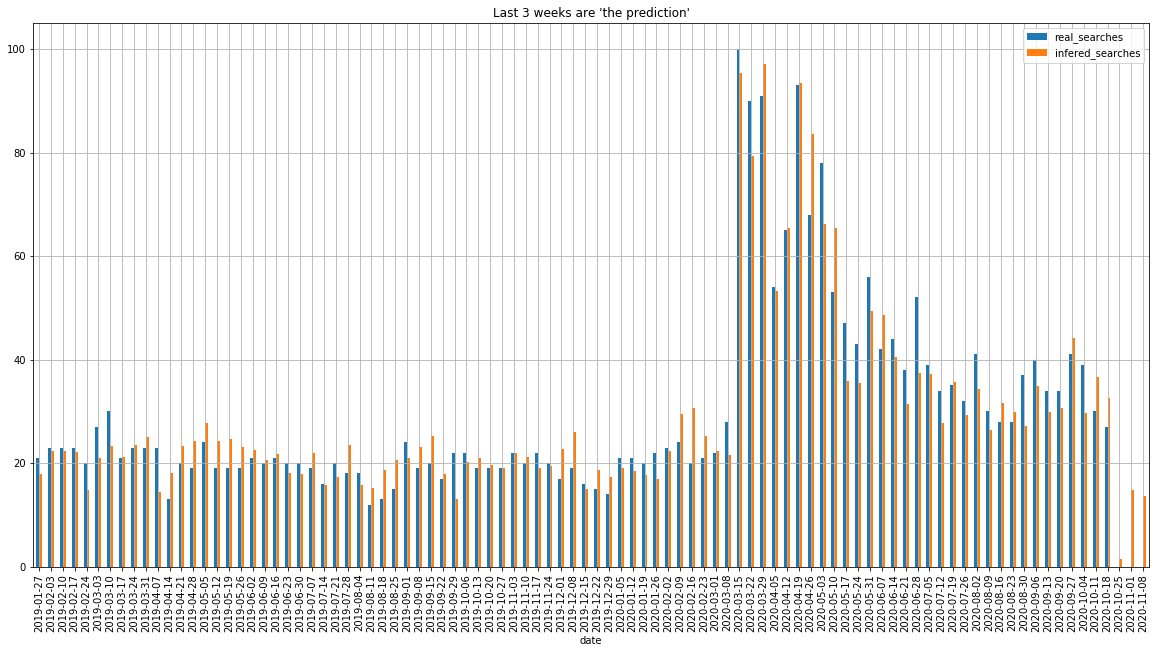

In [24]:
result.plot(x="date",
            y=["real_searches","infered_searches"],
            figsize=(20,10), 
            kind="bar",
            title="Last 3 weeks are 'the prediction'",
            grid=True)

## CSV to append weekly the score

In [9]:
score = pd.DataFrame({"date": [max(df["date"])], 'score': [round(rfecv.score(X, target),4)]})
score.to_csv("input/weekly_score.csv")
score

,date,score
0,2020-11-08,0.9088


## CSV to overwrite weekly ranking of features by importance

In [30]:
features=pd.DataFrame()
features["features"]=X.columns
features["top_important"]=rfecv.ranking_
features.sort_values(by=["top_important"], inplace=True)
features.reset_index(drop=True, inplace=True)
features.to_csv("input/ranking_of_features.csv")
features.head(25)
# Ranking of how important are the following keywords to infer in Google searches in Spain
# the keyword "unemployment"

,features,top_important
0,banco_mundial,1
1,videoconferencia,1
2,uber eats,1
3,bullying,1
4,skype,1
5,refugiados,1
6,caritas,1
7,comparecencia,1
8,pandemia,1
9,nacionalismo,1
